
# SpatialData Reference

Convert the same dataset to SpatialData directly and compare the version created with the `tiledbsoma` library.

## Setup

In [21]:
import json
from pathlib import Path

import spatialdata as sd
import spatialdata_io as sdio
import spatialdata_plot
from scanpy.datasets._datasets import (
    _download_visium_dataset as download_visium_dataset,
)

Load dataset info from `config.json`. 

In [22]:
with open("../config.json", "r") as f:
    config = json.load(f)

dataset = config["datasets"][0]
dataset

{'experiment_name': 'CytAssist_FFPE_Mouse_Brain_Rep2',
 'spaceranger_version': '2.0.0'}

## Download and inspect the data

In [23]:
data_dir = Path(config["data_dir"])
if not data_dir.exists():
    data_dir.mkdir()

dataset_dir = download_visium_dataset(
    sample_id=dataset["experiment_name"],  # type: ignore
    spaceranger_version=dataset["spaceranger_version"],  # type: ignore
    base_dir=data_dir,
)

## Dataset directory structure

Take a look at the structure of the downloaded dataset.

In [24]:
!tree {dataset_dir}

data/CytAssist_FFPE_Mouse_Brain_Rep2
├── CytAssist_FFPE_Mouse_Brain_Rep2_spatial.tar.gz
├── filtered_feature_bc_matrix.h5
└── spatial
    ├── aligned_fiducials.jpg
    ├── aligned_tissue_image.jpg
    ├── cytassist_image.tiff
    ├── detected_tissue_image.jpg
    ├── scalefactors_json.json
    ├── spatial_enrichment.csv
    ├── tissue_hires_image.png
    ├── tissue_lowres_image.png
    └── tissue_positions.csv

2 directories, 11 files


## Convert

In [25]:
exp_name = dataset["experiment_name"].lower()
sdata = sdio.visium(path=dataset_dir, dataset_id=exp_name)
sdata

INFO     reading data/CytAssist_FFPE_Mouse_Brain_Rep2/filtered_feature_bc_matrix.h5                                


/Users/aaronwolen/repos/uv-soma-test/.venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/aaronwolen/repos/uv-soma-test/.venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/aaronwolen/repos/uv-soma-test/.venv/lib/python3.9/site-packages/spatialdata/models/models.py:1035: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)


SpatialData object
├── Images
│     ├── 'cytassist_ffpe_mouse_brain_rep2_hires_image': DataArray[cyx] (3, 2000, 1692)
│     └── 'cytassist_ffpe_mouse_brain_rep2_lowres_image': DataArray[cyx] (3, 600, 508)
├── Shapes
│     └── 'cytassist_ffpe_mouse_brain_rep2': GeoDataFrame shape: (2235, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (2235, 19465)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        cytassist_ffpe_mouse_brain_rep2_hires_image (Images), cytassist_ffpe_mouse_brain_rep2 (Shapes)
    ▸ 'downscaled_lowres', with elements:
        cytassist_ffpe_mouse_brain_rep2_lowres_image (Images), cytassist_ffpe_mouse_brain_rep2 (Shapes)
    ▸ 'global', with elements:
        cytassist_ffpe_mouse_brain_rep2 (Shapes)

## Data

### Tables

In [31]:
sdata.tables["table"].obs

,in_tissue,array_row,array_col,spot_id,region
AACACTTGGCAAGGAA-1,1,47,71,0,cytassist_ffpe_mouse_brain_rep2
AACAGGATTCATAGTT-1,1,49,43,1,cytassist_ffpe_mouse_brain_rep2
AACAGGTTATTGCACC-1,1,28,86,2,cytassist_ffpe_mouse_brain_rep2
AACAGGTTCACCGAAG-1,1,51,41,3,cytassist_ffpe_mouse_brain_rep2
AACCAAGGTATCAGGC-1,1,38,104,4,cytassist_ffpe_mouse_brain_rep2
...,...,...,...,...,...
TGTTGCGTCCAAGATT-1,1,51,65,2230,cytassist_ffpe_mouse_brain_rep2
TGTTGGAACCTTCCGC-1,1,35,35,2231,cytassist_ffpe_mouse_brain_rep2
TGTTGGAACGAGGTCA-1,1,28,72,2232,cytassist_ffpe_mouse_brain_rep2
TGTTGGATGGACTTCT-1,1,13,53,2233,cytassist_ffpe_mouse_brain_rep2


In [33]:
sdata.tables["table"].var

,gene_ids,feature_types,genome
Xkr4,ENSMUSG00000051951,Gene Expression,mm10
Rp1,ENSMUSG00000025900,Gene Expression,mm10
Sox17,ENSMUSG00000025902,Gene Expression,mm10
Lypla1,ENSMUSG00000025903,Gene Expression,mm10
Tcea1,ENSMUSG00000033813,Gene Expression,mm10
...,...,...,...
Zfy2,ENSMUSG00000000103,Gene Expression,mm10
Sry,ENSMUSG00000069036,Gene Expression,mm10
Gm4064,ENSMUSG00000102053,Gene Expression,mm10
Gm3376,ENSMUSG00000096520,Gene Expression,mm10


In [35]:
sdata.tables["table"].uns

OrderedDict([('spatial',
              {'cytassist_ffpe_mouse_brain_rep2': {'metadata': {'chemistry_description': 'Visium V4 Slide',
                 'software_version': 'spaceranger-2.0.0'}}}),
             ('spatialdata_attrs',
              {'region': 'cytassist_ffpe_mouse_brain_rep2',
               'region_key': 'region',
               'instance_key': 'spot_id'})])

### Images

In [48]:
images = sdata.images
print(f"Images is a {type(images)} with {len(images)} image(s)")
images

Images is a <class 'spatialdata._core._elements.Images'> with 2 image(s)


{'cytassist_ffpe_mouse_brain_rep2_hires_image': <xarray.DataArray 'image' (c: 3, y: 2000, x: 1692)> Size: 10MB
dask.array<transpose, shape=(3, 2000, 1692), dtype=uint8, chunksize=(3, 2000, 1692), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) <U1 12B 'r' 'g' 'b'
  * y        (y) float64 16kB 0.5 1.5 2.5 3.5 ... 1.998e+03 1.998e+03 2e+03
  * x        (x) float64 14kB 0.5 1.5 2.5 3.5 ... 1.69e+03 1.69e+03 1.692e+03
Attributes:
    transform:  {'downscaled_hires': Identity }, 'cytassist_ffpe_mouse_brain_rep2_lowres_image': <xarray.DataArray 'image' (c: 3, y: 600, x: 508)> Size: 914kB
dask.array<transpose, shape=(3, 600, 508), dtype=uint8, chunksize=(3, 600, 508), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) <U1 12B 'r' 'g' 'b'
  * y        (y) float64 5kB 0.5 1.5 2.5 3.5 4.5 ... 596.5 597.5 598.5 599.5
  * x        (x) float64 4kB 0.5 1.5 2.5 3.5 4.5 ... 504.5 505.5 506.5 507.5
Attributes:
    transform:  {'downscaled_lowres': Identity }}

In [52]:
images.get(list(images.keys())[0])

<xarray.DataArray 'image' (c: 3, y: 2000, x: 1692)> Size: 10MB
dask.array<transpose, shape=(3, 2000, 1692), dtype=uint8, chunksize=(3, 2000, 1692), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) <U1 12B 'r' 'g' 'b'
  * y        (y) float64 16kB 0.5 1.5 2.5 3.5 ... 1.998e+03 1.998e+03 2e+03
  * x        (x) float64 14kB 0.5 1.5 2.5 3.5 ... 1.69e+03 1.69e+03 1.692e+03
Attributes:
    transform:  {'downscaled_hires': Identity }

### Shapes

In [53]:
shapes = sdata.shapes
print(f"Shapes is a {type(shapes)} with {len(shapes)} shape(s)")
shapes

Shapes is a <class 'spatialdata._core._elements.Shapes'> with 1 shape(s)


{'cytassist_ffpe_mouse_brain_rep2':                     geometry      radius
spot_id                                 
0         POINT (12721 9753)  127.930358
1          POINT (7587 9267)  127.930358
2        POINT (15637 15713)  127.930358
3          POINT (7203 8642)  127.930358
4        POINT (18833 12438)  127.930358
...                      ...         ...
2230      POINT (11588 8514)  127.930358
2231      POINT (6256 13760)  127.930358
2232     POINT (13080 15787)  127.930358
2233      POINT (9748 20657)  127.930358
2234       POINT (8318 9246)  127.930358

[2235 rows x 2 columns]}

### Coordinates

In [55]:
sdata.coordinate_systems

['global', 'downscaled_hires', 'downscaled_lowres']

## Visualize

INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4829932..1.0].


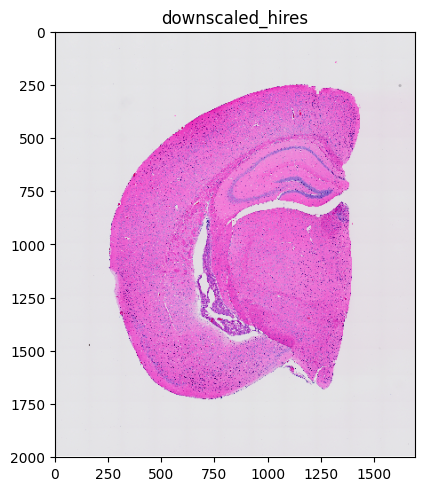

In [26]:
sdata.pl.render_images().pl.show("downscaled_hires")

In [27]:
sdata["table"].to_df().sum(axis=0).sort_values(ascending=False).head(10)

Ttr        667081.0
Fth1       108798.0
Camk2n1    104989.0
Atp1b1     101138.0
Snap25      99798.0
Calm1       82299.0
App         80407.0
Mbp         77770.0
Olfm1       71877.0
Tmsb4x      71351.0
dtype: float32

/var/folders/nr/1dsl0n155wj7wv083km8t1540000gn/T/ipykernel_54611/2504518072.py:2: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_shapes.render_shapes` in spatialdata_plot version 0.3.0, switch to `element` instead.
  sdata.pl.render_images(element="cytassist_ffpe_mouse_brain_rep2_hires_image")


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4829932..1.0].


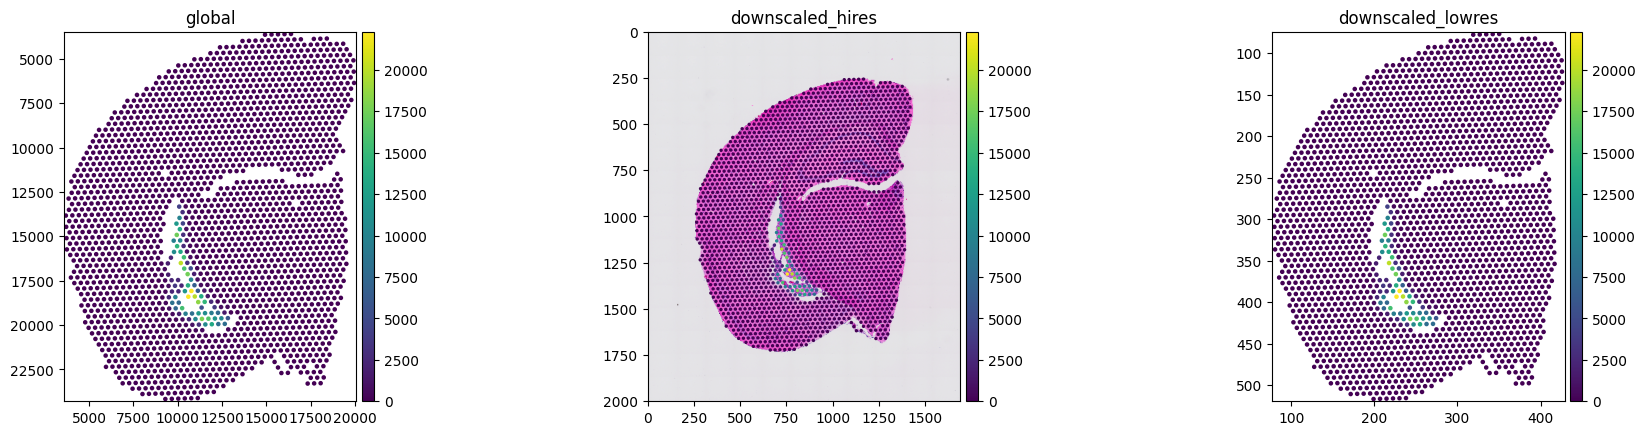

In [28]:
(
    sdata.pl.render_images(element="cytassist_ffpe_mouse_brain_rep2_hires_image")
    .pl.render_shapes(elements="cytassist_ffpe_mouse_brain_rep2", color="Ttr")
    .pl.show()
)